In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [2]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [3]:
# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [5]:
# 정확도 결과
acc = accuracy_score(y_test, y_pred)
print("랜덤포레스트 정확도:", acc)

랜덤포레스트 정확도: 0.9492


# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [6]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [8]:
# PCA 적용 95% : n_components=0.95
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# PCA 이후 랜덤포레스트 훈련
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [10]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
y_pred = rf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)

print("PCA 95% + RandomForest 정확도:", acc)

PCA 95% + RandomForest 정확도: 0.8925


**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [11]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [12]:
wine = load_wine()
X = wine.data        # 피처
y = wine.target      # 레이블 (품종)
target_names = wine.target_names

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [14]:
#PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.
pca = PCA(n_components=2, random_state=1234)
X_pca = pca.fit_transform(X_scaled)

print("원래 차원 수:", X.shape[1])
print("PCA 후 차원 수:", X_pca.shape[1])

원래 차원 수: 13
PCA 후 차원 수: 2


(5) 추출한 피처를 그래프로 나타내라.

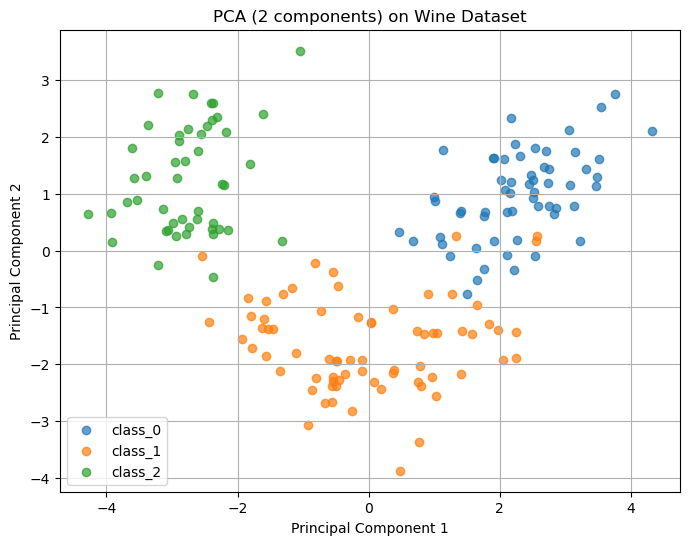

In [15]:
plt.figure(figsize=(8, 6))

colors = ['r', 'g', 'b']
for target, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(
        X_pca[y == target, 0],
        X_pca[y == target, 1],
        alpha=0.7,
        label=label
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 components) on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [16]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
# LDA 적용 : n_components=5
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print("원래 차원:", X_train.shape[1])
print("LDA 후 차원:", X_train_lda.shape[1])

원래 차원: 784
LDA 후 차원: 5


In [19]:
# LDA 이후 랜덤포레스트 훈련
rf_lda = RandomForestClassifier(n_estimators=10, random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda = rf_lda.predict(X_test_lda)

In [20]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("LDA(5) + RandomForest 정확도:", acc_lda)

LDA(5) + RandomForest 정확도: 0.8291
